<h1><center> DS 300 Data Mining: Lab 8 - PCA

## Introduction

#### Dimensionality Reduction with PCA and LDA

PCA and LDA are two common dimensionality reduction techniques. They are sometimes used on its own and may also be used in combination with scale construction and factor analysis. In this lab, we will try several ways of running PCA in Python with a couple of famous datasets.


#### Dataset: Iris

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), found in many clustering or machine learning examples across Python and R, explores several notable features such as sepal length and width and petal length and width for three types of Iris flowers, the [Iris setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg), [Iris versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg), and [Iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg).

![Image](https://steemitimages.com/640x0/https://i.imgur.com/FDL36bf.png)

---

## Question 1

#### Import all the necessary libraries

In [266]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

#### Given the column names in the list `df_cols`, create a DataFrame named `df` from the `iris.data` dataset.
#### Dataset url = 'https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab6_iris.data'

In [267]:
df_cols = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df = pd.read_csv('https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lab6_iris.data',names=df_cols)

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [268]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
sepal_len    152 non-null float64
sepal_wid    153 non-null float64
petal_len    153 non-null float64
petal_wid    152 non-null float64
class        155 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


#### Find the total number of missing values and drop all the NaNs.

In [270]:
df.isnull().sum()

sepal_len    3
sepal_wid    2
petal_len    2
petal_wid    3
class        0
dtype: int64

In [271]:
# drops the lines with missing values

df.dropna(axis=0, inplace=True)


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 154
Data columns (total 5 columns):
sepal_len    150 non-null float64
sepal_wid    150 non-null float64
petal_len    150 non-null float64
petal_wid    150 non-null float64
class        150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [273]:
df.head(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


#### Notice dropping the missing values has messed up the index of the DataFrame (index 7 is gone), let's reset the index of the DataFrame

In [274]:
df.reset_index(drop=True,inplace=True)



In [275]:
df.head(10)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 2:

#### Split the dataset into X (features) and y (labels).

In [276]:
df.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'], dtype='object')

In [277]:
# Split the dataset into X and y
X = df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']]

y = df['class']



In [278]:
X.shape

(150, 4)

In [279]:
y.shape

(150,)

#### Standardize the X matrix.

In [280]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_std = ss.fit_transform(X)


In [281]:
X_std[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Question 3:

#### Apply PCA on X_std matrix to generate `X_reduced`, which has the new basis. Ensure to include all the principal components in `X_reduced`

In [282]:
from sklearn.decomposition import PCA
pca = PCA()


X_reduced = pca.fit(X_std).transform(X_std)


X_reduced.shape

(150, 4)

#### Construct a new DataFrame `df_pca` by using X_reduced, and the label column `class`.

In [283]:
df_pca = pd.DataFrame(X_reduced) 
df_pca['class']=y


df_pca.head()

,0,1,2,3,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


## Question 4:

#### Find the eigenvalues and eigenvectors from the trained `PCA()` object. Hint: there are some attributes for `PCA()` objects that might be helpful ([link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html))

In [284]:
print('Eig values:', pca.explained_variance_)
print('Eig vecotrs:', pca.components_)

Eig values: [2.93035378 0.92740362 0.14834223 0.02074601]
Eig vecotrs: [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


#### A Scree Plot is a simple line or bar plot that shows the fraction of total variance in the data as explained or represented by each PC. The PCs are ordered by decreasing order of contribution to total variance.
#### First, generate a DataFrame `df_scree` with the total 'explained variance ratio' by each PC. Then, use bar plot to show the numbers.

In [285]:
df_scree = pd.DataFrame({'PC':['PC1','PC2','PC3','PC4'],'contribution':pca.explained_variance_ratio_})


df_scree.head()

,PC,contribution
0,PC1,0.727705
1,PC2,0.230305
2,PC3,0.036838
3,PC4,0.005152


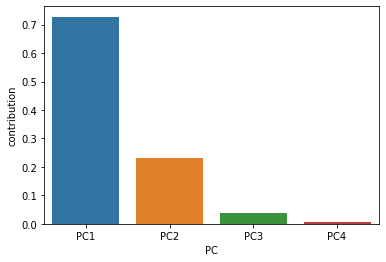

In [286]:
sns.barplot('PC','contribution',data=df_scree)



#### So more than 90% of the variance is explained by the first two principal components.

## Question 5:

#### Find all the unique labels from the DataFrame `df_pca`.

In [287]:
df_pca.head()

,0,1,2,3,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


In [288]:
df_pca['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [289]:
labels = df_pca['class'].unique()


labels 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Write a function `pca_scatter` to draw a 2D scatter plot of the dimensionality-reduced DataFrame on the new basis with 'PCA1' and 'PCA2' (columns 0 and 1 from df_pca). Reference: [link](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

In [290]:
def pca_scatter(df_reduced, labels):
    '''
    Arguments: 
    1) df_reduced: DataFrame with reduced dimensionality by PCA
    2) labels: enumerate all the labels from the same DataFrame
    '''
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 2

    for color, label_name in zip(colors, labels):
        ## Finish the for loop
        plt.scatter(x=df_reduced[df_reduced['class'] ==label_name][0],
                    y=df_reduced[df_reduced['class'] ==label_name][1], color=color, alpha=.8, lw=lw,
                label=label_name)
        
        
        
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA plot of Dataset with pricipal components 1 and 2')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

#### Plot the scatter plot with `pca_scatter`

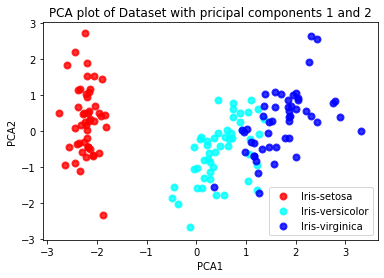

In [291]:
pca_scatter(df_pca, labels)

## Question 6:

#### Let's try to implement our own PCA model by using linear algebra.  
#### Step 1: normalize the X matrix so that it has zero mean.

In [292]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_std = ss.fit_transform(X)


In [293]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


#### Step 2: generate covariance matrix with `X_std`. Note you need to transpose `X_std` then apply covariance calculation.
Hint: check out np.cov() function

In [294]:
#Covariance Matrix
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))


NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


#### Step 3: Use `eig` function from `np.linalg` to get the eigenvalues. 

In [295]:
eig_vals, eig_vecs =  np.linalg.eig(cov_mat)



print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


## Question 7: PCA evaluation

#### Examining PCA loading scores

One way to understand PCA results is by looking at component loadings or loading scores. This allows us to see how informative a particular variable is for the principal component.

#### Create a DataFrame for the loading scores.

In [296]:
df_loading = pd.DataFrame(pca.components_,columns=('PC1','PC2','PC3','PC4'))




df_loading.head()

,PC1,PC2,PC3,PC4
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,-0.721017,0.242033,0.140892,0.633801
3,-0.261996,0.124135,0.801154,-0.523546


#### For the loadings above, we can see that both `sepal width` and `petal length` are highly informative of the first component, which might be thought of as `iris type`. 

#### Examining PCA scoring matrix. 

The scoring matrix is simply the multiplication of two matrices: X_reduced and loading scores. It tells us how much each data sample is projected to the new basis with PCs. 

In [298]:
score = np.dot(X_reduced,df_loading)



score[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

## Question 8: 

#### Let's use Random Forest to train the original dataset `without` PCA.
#### Perform train test split. Test size = 20%, random seed = 101.

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size = 0.2, random_state=101)


X_train[:5]

array([[ 0.79566902, -0.1249576 ,  1.16081857,  1.31648267],
       [-0.41600969, -1.28197243,  0.1372359 ,  0.13322594],
       [ 0.79566902, -0.1249576 ,  0.99022146,  0.79059079],
       [-0.05250608, -0.8191665 ,  0.08037019,  0.00175297],
       [ 1.15917263, -0.1249576 ,  0.99022146,  1.1850097 ]])

#### Train a random forest classifier. Use criterion as 'entropy', n_estimators as 500, max_depth as 5 and random_state as 101.

In [300]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=5, random_state=101)

rf_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

#### Evaluate the classification accuracy.

In [301]:
from sklearn.metrics import accuracy_score
y_pred=rf_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))




0.9666666666666667


## Question 9:

#### Now use the first 3 components from PCA to obtain the new training set.

In [302]:
pca = PCA(n_components=3)


X_reduced = pca.fit_transform(X)





#### Perform train test split. Test size = 20%, random seed = 101.

In [303]:
X_train, X_test, y_train, y_test =  train_test_split(X_reduced, y, test_size = 0.2, random_state=101)

X_train[:5]

array([[ 2.34975798, -0.04188255,  0.28411068],
       [ 0.16451343, -0.67966147, -0.05779924],
       [ 1.94924878,  0.04073026,  0.04272909],
       [ 0.13499495, -0.31170964, -0.1749733 ],
       [ 2.16537886,  0.21528028,  0.03314818]])

#### Train a random forest classifier. Use criterion as 'entropy', n_estimators as 500, max_depth as 5 and random_state as 101.

In [304]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=500, max_depth=5, random_state=101)

rf_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

#### Accuracy evaluation.

In [305]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.9333333333333333


#### Note that applying PCA before Random Forest actually makes the model worse. This is because the original dataset only has 4 data features. Therefore reducing the dimensionality is not going to help us a ton.